In [2]:
import numpy as np
import tensorflow as tf

#입력변수:2개, 출력:3가지 종류


# '기타(o)'분류기 :hf= Wo1x1+Wo2x2+b1
# '포유류(m)'분류기:hf=Wm1x1+Wm2x2+b2
# '조류(b)'분류기:hf=Wb1x1+Wb2x2+b3
#  w변수가 6개 필요함 => 입력변수:2 * 출력변수:3 = 6
    



#[털(x1), 날개(x2)]
x_data = np.array(
    [[0, 0], 
     [1, 0], 
     [1, 1], 
     [0, 0], 
     [0, 0], 
     [0, 1]])
# [기타, 포유류, 조류]
y_data = np.array([ #   [0 1 2 0 0 2]
    [1, 0, 0],  # 기타
    [0, 1, 0],  # 포유류
    [0, 0, 1],  # 조류
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
])
         # [입력특성개수, 출력레이블개수] => [2, 3]
w=tf.Variable(tf.random_normal([2,3]))
b=tf.Variable(tf.zeros([3])) #분류기 개수만큼 존재
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

hf= tf.add(tf.matmul(x,w),b) #x:(6,2), w:(2,3), xw:(6,3), b:(3,)
hf=tf.nn.relu(hf)
model=tf.nn.softmax(hf) #[3, 2, 1.5] => [0.5, 0.3, 0.2]
cost=tf.reduce_mean(-tf.reduce_sum(y * tf.log(model), axis=1))

optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(cost)
#sigmoid(입력값을 0~1로 변환), relu함수(음수->0, 양수->양수값 그대로 출력)
#ex) relu(-3) => 0, relu(5) =>5
#ex) sigmoid(-3) => 0.1, sigmoid(5) => 0.8

#0.1 * 0.1 * 0.1*...* 0.00001 => 0에 가까워
#h(x)->sig->0~1->h(x)->sig->0~1->...->0 이 되기도 함 -> 신호손실
#h(x)->relu ->h(x)->relu->h(x)->...->sigmoid()->0~1사이로 출력




In [3]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [5]:
for step in range(100):
    sess.run(train, feed_dict={x:x_data, y:y_data})
    if(step+1)%10==0:
        print(step+1, sess.run(cost, feed_dict={x:x_data, y:y_data}))

10 1.261794
20 1.2552612
30 1.2488188
40 1.242465
50 1.2361985
60 1.2300181
70 1.2239225
80 1.2179102
90 1.2119802
100 1.2061312


In [7]:
#결과 확인
#[[0 1 0 ] [0 0 1]] => argmax => [1 2]
prediction=tf.argmax(model,1) #[0.5, 0.3, 0.2]
target=tf.argmax(y,1) #1은 행 단위로 이동해가면서 최대값을 찾음,0:
print("예측값:", sess.run(prediction, feed_dict={x:x_data}))
print("실제값:", sess.run(target, feed_dict={y:y_data}))


예측값: [0 1 1 0 0 0]
실제값: [0 1 2 0 0 2]


In [14]:
is_correct=tf.equal(prediction, target)
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32)) #True=>1, False=>0
print("정확도:%.2f" % sess.run(accuracy*100, feed_dict={x:x_data, y:y_data}))

정확도:66.67


In [15]:
from tensorflow.examples.tutorials.mnist import input_data
import random
import matplotlib.pyplot as plt

In [19]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes=10 #0~9
x=tf.placeholder(tf.float32, shape=[None,784]) #784픽셀 =28*28이미지
y=tf.placeholder(tf.float32, shape=[None,nb_classes]) 
w=tf.Variable(tf.random_normal([784,nb_classes]))
b=tf.Variable(tf.random_normal([nb_classes]))
     #                                    0    1    2     3     9
hf= tf.nn.softmax(tf.matmul(x,w)+b ) #[0.01  0.05  0.1  0.4 ...0.01]
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [20]:
#hf => [0.01  0.05  0.1  0.4 ...0.01]=>tf.argmax(hf,1)=> 3(가장 큰값 index)
#y => [0 0 0 1 0 0 0 0 0 0] => tf.argmax(y,1) => 3
#tf.equal => True/False => tf.cast(float) => 1 / 0
iscorrect=tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
#실제값 2, 예측 2 => True
accuracy=tf.reduce_mean(tf.cast(iscorrect, tf.float32))
#1 0 1 1 1 1 0 1 1 1 1 ... 1 => accuracy : 맞은 갯수 / 전체 갯수

에폭:    1 cost= 2.733399140
에폭:    2 cost= 1.119548826
에폭:    3 cost= 0.891142139
에폭:    4 cost= 0.776757397
에폭:    5 cost= 0.703182789
에폭:    6 cost= 0.651897680
에폭:    7 cost= 0.612597745
에폭:    8 cost= 0.581298672
에폭:    9 cost= 0.556303274
에폭:   10 cost= 0.535545765
에폭:   11 cost= 0.517683559
에폭:   12 cost= 0.502425042
에폭:   13 cost= 0.488461044
에폭:   14 cost= 0.476381348
에폭:   15 cost= 0.465343788
학습종료
정확도: 0.8931
우리 모델 예측: [6]


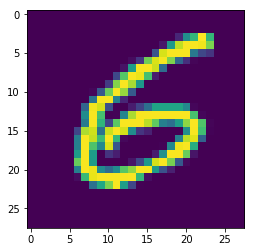

In [33]:
with tf.Session() as sess:  #sess=tf.Session()
    sess.run(tf.global_variables_initializer())
    for epoch in range(15): #15번 반복
        costavr=0
        totalbatch=int(mnist.train.num_examples/100) #5.5만개이미지/100 => 550
        for i in range(totalbatch): #550번 반복, 한번에 100개씩 트레이닝하면 
            batchx, batchy=mnist.train.next_batch(100)#한번에 100개의 이미지를 읽어들임(x,y)
            cv, _=sess.run([cost, train], feed_dict={x:batchx, y:batchy})
            costavr += cv/totalbatch #cost의 평균
        print("에폭:", "%4d"%(epoch+1), "cost=", "{:.9f}".format(costavr))
    print("학습종료")    
    print("정확도:", accuracy.eval(session=sess, feed_dict={
        x:mnist.test.images, y:mnist.test.labels
    }))
    r=random.randint(0, mnist.test.num_examples-1)
    print("우리 모델 예측:",
          sess.run(tf.argmax(hf,1), 
          feed_dict={x:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show()

In [29]:
mnist.train.num_examples
batchx, batchy=mnist.train.next_batch(1)
batchy

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [31]:
r=random.randint(0, mnist.test.num_examples-1)
print("우리 모델 예측:",sess.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images[r:r+1]}))
plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
plt.show()


RuntimeError: Attempted to use a closed Session.

In [34]:
mnist.test.num_examples

10000

In [35]:
#BoW:단어의 출현 빈도를 나타내는 방법
# -단어에 index
# -index에 해당되는 단어의 등장 횟수를 벡터로 기록
from konlpy.tag import Okt
import re
okt=Okt()

In [42]:
re.sub("가", "나", "가나다라가") #"가나다라"에서 "가"를 "나"로 변경
re.sub("가","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")
token=re.sub("\.","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")

In [51]:
token=okt.morphs(token) #형태소분석 -> 토큰화

RuntimeError: No matching overloads found for tokenize in find. at native\common\jp_method.cpp:127

In [60]:
word2index={}
bow=[]

In [61]:
for voc in token:
    if voc not in word2index.keys():
        word2index[voc]=len(word2index)
        bow.insert(len(word2index)-1, 1)
    else:
        index=word2index.get(voc)
        bow[index]=bow[index]+1

In [62]:
print(word2index) #각 형태소마다 인덱스를 부
print(bow)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [66]:
#countervectorizer
from sklearn.feature_extraction.text import CountVectorizer
corpus=['you know I want your love. because I love you.']
vector=CountVectorizer() #코퍼스에서 각 단어의 빈도수 조사
#ex) 파이썬 자바 연필 -> 프로그래밍 코퍼스에 해당되지 않는것은? 연필
#코퍼스 : 특정 분야의 해당되는 단어들의 집합

print(vector.fit_transform(corpus).toarray())
#   0 1 2 3 4 5 
# [[1 1 2 1 2 1]] => 각 index위치에 해당되는 단어의 빈도
#'you know I want your love. because I love you.'
#'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0
print(vector.vocabulary_)

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [69]:
text=["Family is not an important thing. It's everything."]
vector=CountVectorizer(stop_words=['a','an','the', 'is','not'])
print(vector.fit_transform(text).toarray())
print(vector.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [70]:
#CountVectorizer에 등록된 불용어 제거
text=["Family is not an important thing. It's everything."]
vector=CountVectorizer(stop_words="english")
print(vector.fit_transform(text).toarray())
print(vector.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


In [71]:
#nltk에 등록된 불용어 제거
from nltk.corpus import stopwords
sw=stopwords.words("english")
text=["Family is not an important thing. It's everything."]
vector=CountVectorizer(stop_words=sw)
print(vector.fit_transform(text).toarray())
print(vector.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


In [72]:
#TDM:단어 문서 행렬, 여러 문서에 등장하는 각 단어의 빈도를 나타낸 행렬
# EX)
# 문서1 : 자고 싶은 나
# 문서2 : 자고 싶은 우리
# 문서3 : 졸리고 졸린 우리
# 문서4 : 저는 계속 졸려요

#TDM예시
#       자고  싶은 나  우리 졸리고 졸린 ...졸려요
# 문서1  1     1   1   0     0      0  ...  0
# ...
# 문서4

In [73]:
tf:특정 문서에서 단어가 등장한 횟수
df:특정 단어가 등장한 문서의 수
문서1, 문서2, 문서3 중에서 '우리' 단어가 문서1에서 5번등장, 문서3에서 2번등장
'우리' 단어의 df? 2
idf = log(n / (1+df)), n:문서의 수(3)
# 문서1 : 자고 싶은 나
# 문서2 : 자고 싶은 우리
# 문서3 : 졸리고 졸린 우리
# 문서4 : 저는 계속 졸려요
'자고' IDF?   log(4 / (1+2)) => log(4/3) =>0.xxx


SyntaxError: invalid syntax (<ipython-input-73-31ee0ceea1b2>, line 1)

In [75]:
corpus=[
    'you know I want your love',
    'I like you',
    'What should I do'    
]
vect=CountVectorizer()
print(vect.fit_transform(corpus).toarray())
print(vect.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
tfidfv=TfidfVectorizer().fit(corpus)
print(tfidfv.fit_transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
#자연어처리 -> 주제어 단어 추출(TFIDF)

#두 문서간 유사도 조사? 코사인 유사도:두 벡터 간 코사인 각도 -> 벡터 유사도